**Gaussian Naive Bayes**

Dane mają rozkład normalny - Gaussowski

Tworzenie danych

In [1]:
import pandas as pd

In [2]:
las=['iglasty','lisciasty','lisciasty','lisciasty','lisciasty','iglasty','iglasty','lisciasty','iglasty',
'iglasty','iglasty','iglasty','iglasty','iglasty', 'iglasty','lisciasty','lisciasty','lisciasty','lisciasty','iglasty','iglasty','lisciasty','iglasty',
'iglasty','iglasty','iglasty','iglasty','iglasty']
kiedy_padalo=['wczoraj','ostatni_tydzien','wczoraj','ostatni_miesiac','wczoraj','ostatni_tydzien','ostatni_tydzien','ostatni_miesiac','wczoraj','ostatni_miesiac','wczoraj','wczoraj','wczoraj','wczoraj', 'wczoraj','ostatni_tydzien','wczoraj','ostatni_miesiac','wczoraj','ostatni_tydzien','ostatni_tydzien','ostatni_miesiac','wczoraj','ostatni_miesiac','wczoraj','wczoraj','wczoraj','wczoraj']

GRZYBY_PRAWDZIWKI=['tak','nie','nie','tak','tak','nie','tak','nie','tak','nie','tak','tak','tak','tak','tak','nie','nie','tak','tak','nie','tak','nie','tak','nie','tak','tak','tak','tak']

Zamiana stringów na liczby

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
las_encoded=le.fit_transform(las)
print(las_encoded)

[0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0]


In [5]:
padalo_encoded=le.fit_transform(kiedy_padalo)
print(padalo_encoded)

[2 1 2 0 2 1 1 0 2 0 2 2 2 2 2 1 2 0 2 1 1 0 2 0 2 2 2 2]


In [6]:
prawdziwki_encoded=le.fit_transform(GRZYBY_PRAWDZIWKI)
print(prawdziwki_encoded)

[1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1]


In [7]:
df = pd.DataFrame({"las_encoded": las_encoded,"padalo_encoded": padalo_encoded,
                  "prawdziwki_encoded": prawdziwki_encoded,})

In [8]:
X = df.drop('prawdziwki_encoded',axis='columns')
y = df.prawdziwki_encoded

Podział test-train

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Ewaluacja modelu

In [11]:
model.score(X_test, y_test)

0.3333333333333333

In [12]:
y_predicted = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)
pd.crosstab(y_test, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
0,4,4
1,2,2
All,6,6


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [16]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9375

Przewidywanie nowego przypadku

In [18]:
predicted= model.predict([[0,2]])
print ("Predicted Value:", predicted)

Predicted Value: [1]


**Dla targetu wielokategorycznego- iris**

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [20]:
training = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')

In [21]:
xtrain = training.drop('Species', axis=1)
ytrain = training.loc[:, 'Species']
xtest = test.drop('Species', axis=1)
ytest = test.loc[:, 'Species']

In [22]:
model = GaussianNB()
model.fit(xtrain, ytrain) 
pred = model.predict(xtest)

Text(89.18, 0.5, 'Predicted')

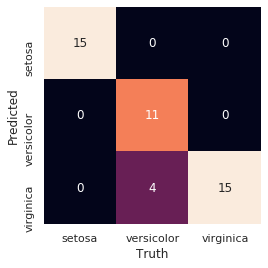

In [23]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

**Zadanie** Wygeneruj własny zbiór danych -minimum 20 obserwacji i 3 zmienne + target (może być multikategoryczny)
Dopasuj do niego model Gaussowski NB, nie zapomnij o ewaluacji!

**Multinomial Naive Bayes**

Opisane właśnie założenie gaussowskie w żadnym wypadku nie jest jedynym prostym założeniem, które można zastosować do określenia rozkładu generatywnego dla każdej etykiety. Innym przydatnym przykładem jest wielomianowy naiwny Bayes, w którym zakłada się, że cechy są generowane z prostego rozkładu wielomianowego. Rozkład wielomianowy opisuje prawdopodobieństwo zaobserwowania zliczeń wśród wielu kategorii, a zatem wielomianowy naiwny Bayes jest najbardziej odpowiedni dla cech reprezentujących zliczenia lub wskaźniki zliczania.

Pomysł jest dokładnie taki sam jak poprzednio, z tą różnicą, że zamiast modelować rozkład danych z najlepiej dopasowanym rozkładem Gaussa, modelujemy rozkład danych z najlepiej dopasowanym rozkładem wielomianowym.

Jednym z miejsc, w którym często stosuje się wielomianowe naiwne Bayesa, jest klasyfikacja tekstu, gdzie cechy są związane z liczbą słów lub częstotliwościami w dokumentach, które mają być klasyfikowane. Użyjemy rzadkich funkcji liczenia słów z korpusu 20 grup dyskusyjnych, aby pokazać, jak możemy podzielić te krótkie dokumenty na kategorie.

In [24]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Wybór kilku kategorii i pobranie test i train

In [25]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)



Słowa, aby mogły zostac poddane analizie muszą zostać zwektoryzowane Tfidem (tak jak juz zwektoryzowane byly liczby z digitsów)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB()) #naszym modelem jest wykonanie Tfid i Multinomial pod rzad

In [27]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [28]:
model.score(test.data, test.target)

0.8016759776536313

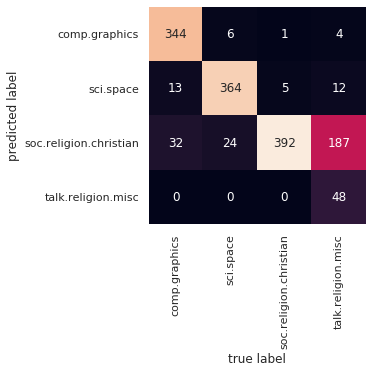

In [29]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Oczywiście nawet ten bardzo prosty klasyfikator może z powodzeniem oddzielić rozmowę kosmiczną od rozmowy komputerowej, ale myli się między rozmową o religii a chrześcijaństwem. 

**BernoulliNB**

Najlepiej działa na danych samych 0,1 (Pamiętacie probe Bernoulliego?)

In [30]:
from sklearn.naive_bayes import BernoulliNB

model = make_pipeline(TfidfVectorizer(), BernoulliNB())
model.fit(train.data, train.target)

labels = model.predict(test.data)

In [31]:
model.score(test.data, test.target)

0.7751396648044693

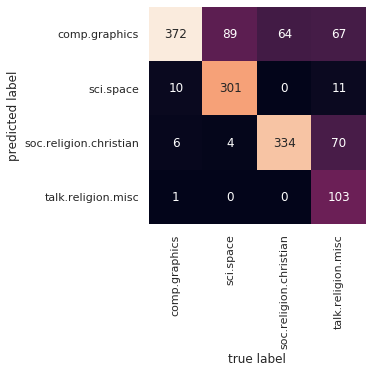

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Polecam przejrzeć: https://github.com/aryancodify/NaiveBayesClassification/blob/master/Multinomial_Bernoulli_pythonNB.ipynb

**Zadanie** Spróbuj zastosować Multinomial jak i Bernoulli NB do danych z Titanica (nie muszą być wszystkie kolumny) 

In [33]:
titanic = pd.read_csv('titanic.csv')

In [34]:
titanic_copy = titanic.copy(deep = True)

In [35]:
titanic_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_copy.groupby('Embarked').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,4005.92,65,61,10072.2962
Q,32178,30,224,786.50,33,13,1022.2543
S,289496,217,1514,16312.75,368,266,17439.3988


In [37]:
titanic_copy['Sex'] = titanic_copy['Sex'].map({'male':1, 'female':0})

In [38]:
titanic_copy['Embarked'] = titanic_copy['Embarked'].map({'C':1, 'Q':2, 'S':3})

In [39]:
titanic_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3.0


In [40]:
le = preprocessing.LabelEncoder()

In [41]:
titanic_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
titanic_copy['Cabin'] = le.fit_transform(titanic_copy['Cabin'])

TypeError: argument must be a string or number